# Plotting a builtin waveform

In the ``tools`` sub-package is a module called ``plot_source_wave`` which can be used to plot any of the builtin waveforms in time and frequency domains. The module takes the following arguments:

* ``type`` is the type of the waveform, e.g. ricker
* ``amp`` is the amplitude of the waveform
* ``freq`` is the centre frequency of the waveform
* ``timewindow`` is the time window used to view the waveform, i.e. the time window of the proposed simulation
* ``dt`` is the time step used to view the waveform, i.e. the time step of the proposed simulation

There is an optional argument:

* ``-fft`` a switch to turn on the FFT plotting for a single field component or current

For example (to use the module outside this notebook) to plot a Ricker waveform (and FFT) with an amplitude of 1, centre frequency of 1.5GHz and with a time window of 3ns and time step of 1.926ps:

    python -m tools.plot_source_wave ricker 1 1.5e9 3e-9 1.926e-12 -fft

You can use the following code to experiment (in this notebook) with plotting different waveforms.

Waveform characteristics...
Type: ricker
Maximum amplitude: 1
Centre frequency: 2.5e+07 Hz
Time to centre of pulse: 5.65685e-08 s
Time window: 3e-07 s (3742 iterations)
Time step: 8.019e-11 s


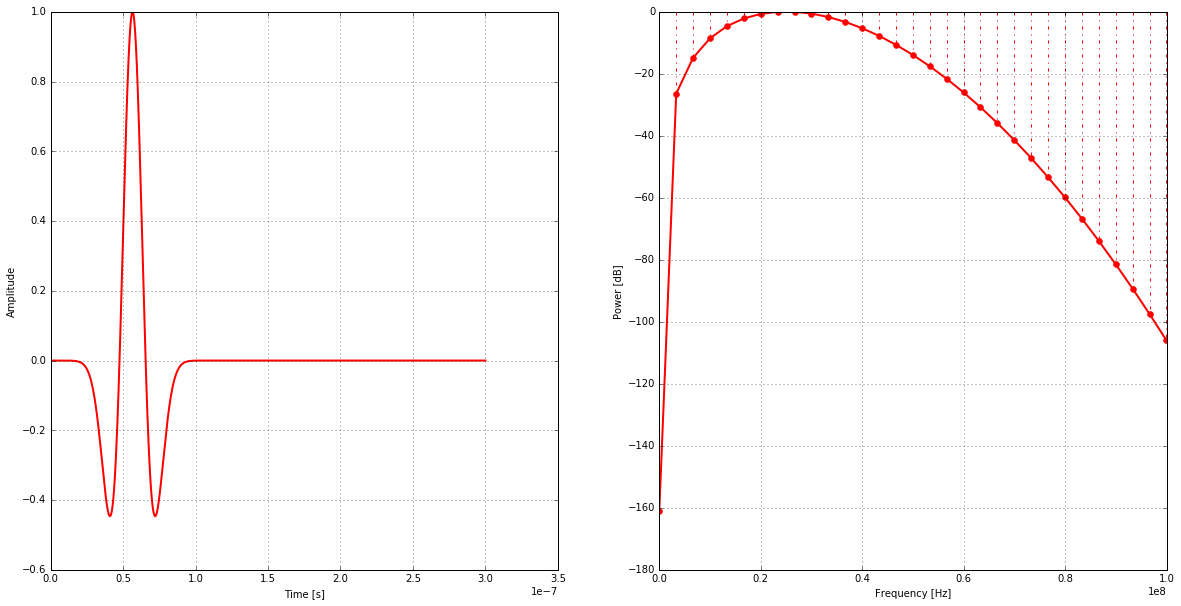

In [1]:
%matplotlib inline
from gprMax.waveforms import Waveform
from tools.plot_source_wave import check_timewindow, mpl_plot

w = Waveform()
w.type = 'ricker'
w.amp = 1
w.freq = 25e6
timewindow = 300e-9
dt = 8.019e-11

timewindow, iterations = check_timewindow(timewindow, dt)
plt = mpl_plot(w, timewindow, dt, iterations, fft=True)

# Plotting a user-defined waveform

This notebook can be used to plot a user-defined waveform in time and frequency domains.

You can use the following code to experiment (in this notebook) with plotting different waveforms.

Waveform characteristics...
Type: user
Maximum amplitude: 69.9616
Time window: 2e-09 s (425 iterations)
Time step: 4.71731e-12 s
Centre frequency: 2.99273e+09 Hz


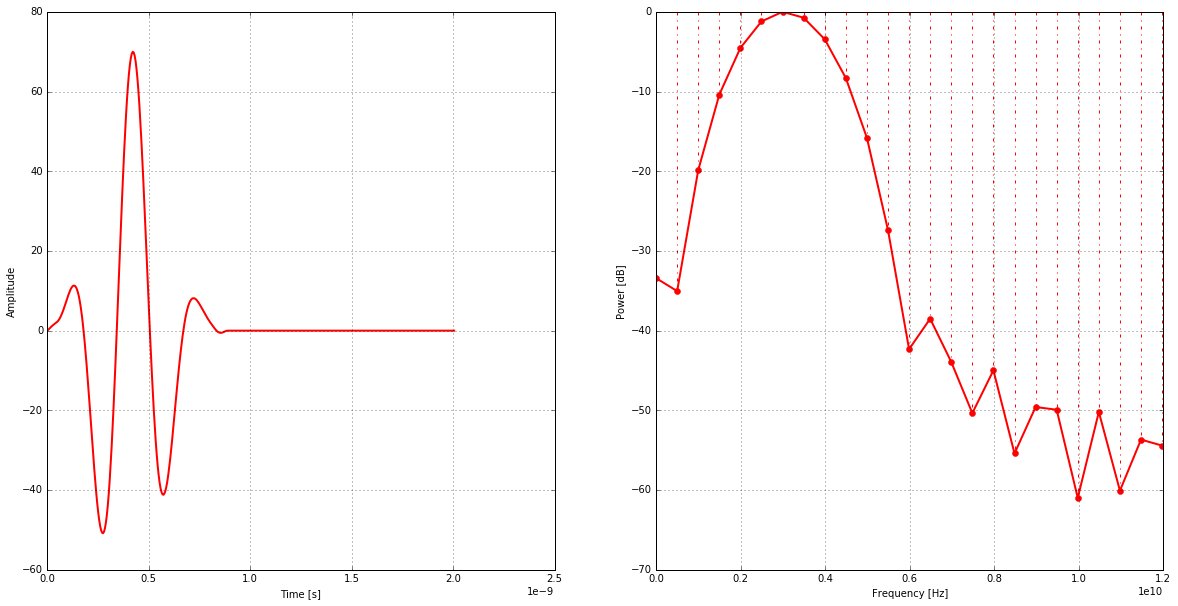

In [2]:
%matplotlib inline
import numpy as np
from gprMax.waveforms import Waveform
from tools.plot_source_wave import check_timewindow, mpl_plot

waveformvalues = np.loadtxt('/Users/cwarren/Desktop/sajad/SW_corrected.txt', skiprows=1, dtype=np.float32)

w = Waveform()
w.type = 'user'
w.amp = 1
w.freq = 0
w.uservalues = waveformvalues[:]
timewindow = 2e-9
dt = 4.71731e-12

timewindow, iterations = check_timewindow(timewindow, dt)
w.uservalues = np.zeros(iterations, dtype=np.float32)
w.uservalues[0:len(waveformvalues)] = waveformvalues[:]
plt = mpl_plot(w, timewindow, dt, iterations, fft=True)

# Determining a spatial resolution
You can use the following code as a guide to determining a spatial resolution for a simulation.

In [10]:
from math import sqrt

# Speed of light in vacuum (m/s)
c = 299792458

# Highest relative permittivity present in model
er = 81

# Maximum frequency present in model
fmax = 80e6

# Minimum wavelength
wmin = c / (fmax * sqrt(er))

# Maximum spatial resolution (allowing 10 cells per wavelength)
dmin = wmin / 10

# Time steps at CFL limits for cubic cells
dt3D = dmin / (sqrt(3) * c)
dt2D = dmin / (sqrt(2) * c)

print('Minimum wavelength: {:g} m'.format(wmin))
print('Maximum spatial resolution: {:g} m'.format(dmin))
print('Time step for 3D cubic cell: {:g} s'.format(dt3D))
print('Time step for 2D square cell: {:g} s'.format(dt2D))

Minimum wavelength: 0.416378 m
Maximum spatial resolution: 0.0416378 m
Time step for 3D cubic cell: 8.01875e-11 s
Time step for 2D cubic cell: 9.82093e-11 s
